In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Colab Notebooks/"
base_dir = root_dir + 'CIFAR10/'
os.chdir(base_dir)
!ls

Populating the interactive namespace from numpy and matplotlib
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
ArrangedDataset.npy  cifar_x_test_preprocessed.npy   cifar_y_train.npy
cifar-10-batches-py  cifar_x_train.npy		     classification_models
CIFAR.ipynb	     cifar_x_train_preprocessed.npy  custom_CNN_BEST.h5
cifar_x_test.npy     cifar_y_test.npy		     lenet_BEST.h5


In [0]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam, SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator


### Convert raw data into images that can be used by a CNN


In [0]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

raw_data = []
raw_labels = []
for i in range(1,6):
    file = os.path.join("cifar-10-batches-py", "data_batch_"+str(i))
    raw_data.append(unpickle(file)[b'data'])
    raw_labels.append(unpickle(file)[b'labels'])

In [0]:
raw_data = np.array(raw_data)
raw_data_reshaped = np.reshape(raw_data, (50000,3072))
red_mean = np.mean(raw_data_reshaped[:,0:1024-1])
green_mean = np.mean(raw_data_reshaped[:,1024:1024*2 - 1])
blue_mean = np.mean(raw_data_reshaped[:,1024*2:1024*3 - 1])
print("Means :",red_mean, green_mean, blue_mean)

red_std = np.std(raw_data_reshaped[:,0:1024-1])
green_std = np.std(raw_data_reshaped[:,1024:1024*2 - 1])
blue_std = np.std(raw_data_reshaped[:,1024*2:1024*3 - 1])
print("STDs :",red_std, green_std, blue_std)

Means : 125.30561583577713 122.94755943304008 113.86487831867058
STDs : 62.99128752380878 62.08809154253781 66.70550870544541


Shape : (50000, 32, 32, 3)


(32, 32, 3)

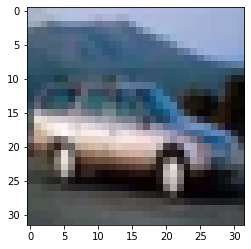

In [0]:
raw_data = np.array(raw_data)
raw_data_reshaped = np.reshape(raw_data, (50000,3072))
raw_data_reshaped.shape
raw_data_reshaped = np.reshape(raw_data_reshaped, (50000, 3, 32, 32))

images = []
for y in raw_data_reshaped:    
    images.append(np.transpose(y, (1,2,0)))

images = np.array(images)
print("Shape :",images.shape)
plt.imshow(images[4])
images[4].shape

In [0]:
images = images.astype('float32')
print(images.shape)
# images /= 255.0
mean = [125.307, 122.95, 113.865]
std  = [62.9932, 62.0887, 66.7048]
for i in range(3):
    images[:,:,:,i] = (images[:,:,:,i] - mean[i]) / std[i]
#     x_test[:,:,:,i] = (x_test[:,:,:,i] - mean[i]) / std[i]
# return x_train, x_test

(50000, 32, 32, 3)


In [0]:
x_train[0].shape

(32, 32, 3)

In [0]:
num_classes = 10
raw_labels = np.array(raw_labels)
raw_labels = np.reshape(raw_labels,(50000,1))
raw_labels.shape
raw_labels
ohe_raw_train = np_utils.to_categorical(raw_labels, num_classes)# 10 classes
y_train = ohe_raw_train

In [0]:
file = os.path.join("cifar-10-batches-py", "test_batch")
test_batch = unpickle(file)

x_test = np.array(test_batch[b'data'])
x_test = np.reshape(x_test, (10000, 3, 32, 32))
x_test_new = []
for y in x_test:
    x_test_new.append(np.transpose(y, (1,2,0)))
x_test_new = np.array(x_test_new)
x_test = x_test_new
x_test = x_test.astype('float32')
for i in range(3):
    x_test[:,:,:,i] = (x_test[:,:,:,i] - mean[i]) / std[i]

y_test = np.array(test_batch[b'labels'])
y_test = np.reshape(y_test, (10000,1))
y_test_ohe = np_utils.to_categorical(y_test, num_classes)
y_test = y_test_ohe

In [0]:
np.save("cifar_x_train_preprocessed", x_train)
np.save("cifar_y_train", y_train)
np.save("cifar_x_test_preprocessed", x_test)
np.save("cifar_y_test", y_test)

In [7]:
x_train = np.array([])
y_train = np.array([])
x_test = np.array([])
y_test = np.array([])
x_train = np.load("cifar_x_train_preprocessed.npy")
y_train = np.load("cifar_y_train.npy")
x_test = np.load("cifar_x_test_preprocessed.npy")
y_test = np.load("cifar_y_test.npy")

print("x_train ->", x_train.shape)
print("y_train ->", y_train.shape)
print("x_test ->", x_test.shape)
print("y_test ->", y_test.shape)

x_train -> (50000, 32, 32, 3)
y_train -> (50000, 10)
x_test -> (10000, 32, 32, 3)
y_test -> (10000, 10)


In [0]:
def get_generators(batch_size):
  gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)
  test_gen = ImageDataGenerator()

  train_generator = gen.flow(x_train, y_train, batch_size=batch_size)
  test_generator = test_gen.flow(x_test, y_test, batch_size=batch_size)
  return train_generator, test_generator


### Simple CNN

#### Three steps to create a CNN
- 1. Convolution
- 2. Activation
- 3. Pooling
    - Repeat Steps 1,2,3 for adding more hidden layers
- 4. After that make a fully connected network
    - This fully connected network gives ability to the CNN to classify the samples

In [0]:
def custom_CNN(num_classes):

    model = Sequential()

    model.add(ZeroPadding2D(input_shape=(32,32,3)))
    model.add(ZeroPadding2D(input_shape=(32,32,3)))
    model.add(Conv2D(32, 5))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(ZeroPadding2D())
    model.add(ZeroPadding2D())
    model.add(Conv2D(32, 5))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(ZeroPadding2D())
    model.add(Conv2D(64, 3))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(ZeroPadding2D())
    model.add(Conv2D(64, 3))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(ZeroPadding2D())
    model.add(Conv2D(128, 3))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(ZeroPadding2D())
    model.add(Conv2D(128, 3))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    return model

In [0]:
model = custom_CNN(10)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [0]:
bs = 128
train_generator, test_generator = get_generators(bs)
model.fit_generator(train_generator, epochs=10, steps_per_epoch=50000//bs, validation_data=test_generator, validation_steps=10000//bs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
390/390 [==============================] - 33s 86ms/step - loss: 1.3624 - acc: 0.5144 - val_loss: 1.2218 - val_acc: 0.5910
Epoch 2/10
390/390 [==============================] - 25s 65ms/step - loss: 0.9054 - acc: 0.6785 - val_loss: 0.7850 - val_acc: 0.7317
Epoch 3/10
390/390 [==============================] - 26s 66ms/step - loss: 0.7388 - acc: 0.7406 - val_loss: 1.0883 - val_acc: 0.6471
Epoch 4/10
390/390 [==============================] - 26s 65ms/step - loss: 0.6383 - acc: 0.7771 - val_loss: 0.7537 - val_acc: 0.7429
Epoch 5/10
390/390 [==============================] - 26s 66ms/step - loss: 0.5686 - acc: 0.8020 - val_loss: 0.6825 - val_acc: 0.7720
Epoch 6/10
390/390 [==============================] - 25s 65ms/step - loss: 0.5096 - acc: 0.8219 - val_loss: 0.8730 - val_acc: 0.7255
Epoch 7/10
390/390 [==============================] - 25s 65ms/step - loss: 0.4673 - acc: 0.8367 - v

In [0]:
bs = 64
train_generator, test_generator = get_generators(bs)
model.fit_generator(train_generator, epochs=10, steps_per_epoch=50000//bs, validation_data=test_generator, validation_steps=10000//bs)

Epoch 1/10
781/781 [==============================] - 29s 37ms/step - loss: 0.4670 - acc: 0.8357 - val_loss: 0.5892 - val_acc: 0.8078
Epoch 2/10
781/781 [==============================] - 29s 37ms/step - loss: 0.3941 - acc: 0.8616 - val_loss: 0.7073 - val_acc: 0.7844
Epoch 3/10
781/781 [==============================] - 29s 37ms/step - loss: 0.3535 - acc: 0.8756 - val_loss: 0.5375 - val_acc: 0.8316
Epoch 4/10
781/781 [==============================] - 29s 37ms/step - loss: 0.3244 - acc: 0.8851 - val_loss: 0.6450 - val_acc: 0.8056
Epoch 5/10
781/781 [==============================] - 28s 36ms/step - loss: 0.3017 - acc: 0.8934 - val_loss: 0.5585 - val_acc: 0.8280
Epoch 6/10
781/781 [==============================] - 29s 37ms/step - loss: 0.2724 - acc: 0.9028 - val_loss: 0.5425 - val_acc: 0.8308
Epoch 7/10
781/781 [==============================] - 29s 37ms/step - loss: 0.2646 - acc: 0.9048 - val_loss: 0.6337 - val_acc: 0.8114
Epoch 8/10
781/781 [==============================] - 28s 36ms

In [0]:
model.load_weights('custom_CNN_BEST.h5')

In [0]:
bs = 64
train_generator, test_generator = get_generators(bs)
model.fit_generator(train_generator, epochs=10, steps_per_epoch=50000//bs, validation_data=test_generator, validation_steps=10000//bs)

Epoch 1/10
781/781 [==============================] - 29s 37ms/step - loss: 0.2010 - acc: 0.9289 - val_loss: 0.4618 - val_acc: 0.8650
Epoch 2/10
781/781 [==============================] - 29s 37ms/step - loss: 0.1751 - acc: 0.9391 - val_loss: 0.4586 - val_acc: 0.8652
Epoch 3/10
781/781 [==============================] - 29s 37ms/step - loss: 0.1621 - acc: 0.9437 - val_loss: 0.4436 - val_acc: 0.8677
Epoch 4/10
781/781 [==============================] - 29s 37ms/step - loss: 0.1472 - acc: 0.9492 - val_loss: 0.4430 - val_acc: 0.8682
Epoch 5/10
781/781 [==============================] - 28s 36ms/step - loss: 0.1421 - acc: 0.9504 - val_loss: 0.4517 - val_acc: 0.8675
Epoch 6/10
781/781 [==============================] - 28s 36ms/step - loss: 0.1367 - acc: 0.9524 - val_loss: 0.4508 - val_acc: 0.8674
Epoch 7/10
781/781 [==============================] - 28s 36ms/step - loss: 0.1293 - acc: 0.9548 - val_loss: 0.4393 - val_acc: 0.8735
Epoch 8/10
781/781 [==============================] - 29s 37ms

#### Some Research showed :
Nitish Shirish Keskar and Richard Socher in their paper ‘Improving Generalization Performance by Switching from Adam to SGD’ [5] also showed that by switching to SGD during training training they’ve been able to obtain better generalization power than when using Adam alone. They proposed a simple fix which uses a very simple idea. They’ve noticed that in earlier stages of training Adam still outperforms SGD but later the learning saturates. They proposed simple strategy which they called SWATS in which they start training deep neural network with Adam but then switch to SGD when certain criteria hits. They managed to achieve results comparable to SGD with momentum.

### LeNet-5 
- Reference : https://engmrk.com/lenet-5-a-classic-cnn-architecture/

In [0]:
def make_LeNet(num_classes):
    model = Sequential()

    model.add(Conv2D(6, 5, input_shape=(32,32,3)))
    model.add(Activation('tanh'))
    model.add(AveragePooling2D(pool_size=(2,2)))

    model.add(Conv2D(16, 5))
    model.add(Activation('tanh'))
    model.add(AveragePooling2D(pool_size=(2,2)))

    model.add(Conv2D(120, 5))
    model.add(Activation('tanh'))
    model.add(Flatten())

    model.add(Dense(84))
    model.add(Activation('tanh'))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    return model

In [0]:
model = make_LeNet(10)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [0]:
bs = 128
train_generator, test_generator = get_generators(bs)
model.fit_generator(train_generator, epochs=10, steps_per_epoch=50000//bs, validation_data=test_generator, validation_steps=10000//bs)

Epoch 1/10
390/390 [==============================] - 24s 60ms/step - loss: 1.8062 - acc: 0.3627 - val_loss: 1.6567 - val_acc: 0.4171
Epoch 2/10
390/390 [==============================] - 23s 58ms/step - loss: 1.6317 - acc: 0.4230 - val_loss: 1.5158 - val_acc: 0.4638
Epoch 3/10
390/390 [==============================] - 22s 58ms/step - loss: 1.5162 - acc: 0.4624 - val_loss: 1.4321 - val_acc: 0.4874
Epoch 4/10
390/390 [==============================] - 22s 58ms/step - loss: 1.4345 - acc: 0.4904 - val_loss: 1.3726 - val_acc: 0.5054
Epoch 5/10
390/390 [==============================] - 23s 58ms/step - loss: 1.3786 - acc: 0.5091 - val_loss: 1.3279 - val_acc: 0.5287
Epoch 6/10
390/390 [==============================] - 23s 58ms/step - loss: 1.3363 - acc: 0.5264 - val_loss: 1.2848 - val_acc: 0.5445
Epoch 7/10
390/390 [==============================] - 23s 58ms/step - loss: 1.3058 - acc: 0.5356 - val_loss: 1.2735 - val_acc: 0.5462
Epoch 8/10
390/390 [==============================] - 23s 58ms

In [0]:
def make_LeNet_custom(num_classes):
    model = Sequential()

    model.add(Conv2D(6, 5, input_shape=(32,32,3)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('tanh'))
    model.add(AveragePooling2D(pool_size=(2,2)))

    model.add(Conv2D(16, 5))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('tanh'))
    model.add(AveragePooling2D(pool_size=(2,2)))

    model.add(Conv2D(120, 5))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('tanh'))
    model.add(Flatten())

    model.add(Dense(84))
    model.add(Activation('tanh'))
    model.add(Dropout(0.3))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    return model

In [0]:
model = make_LeNet_custom(10)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
bs = 64
train_generator, test_generator = get_generators(bs)
model.fit_generator(train_generator, epochs=10, steps_per_epoch=50000//bs, validation_data=test_generator, validation_steps=10000//bs)

Epoch 1/10
781/781 [==============================] - 27s 34ms/step - loss: 1.7855 - acc: 0.3640 - val_loss: 1.5649 - val_acc: 0.4502
Epoch 2/10
781/781 [==============================] - 25s 32ms/step - loss: 1.5458 - acc: 0.4466 - val_loss: 1.4208 - val_acc: 0.4944
Epoch 3/10
781/781 [==============================] - 25s 32ms/step - loss: 1.4524 - acc: 0.4794 - val_loss: 1.3658 - val_acc: 0.5132
Epoch 4/10
781/781 [==============================] - 25s 32ms/step - loss: 1.4054 - acc: 0.5002 - val_loss: 1.2918 - val_acc: 0.5419
Epoch 5/10
781/781 [==============================] - 25s 32ms/step - loss: 1.3664 - acc: 0.5144 - val_loss: 1.2863 - val_acc: 0.5453
Epoch 6/10
781/781 [==============================] - 25s 32ms/step - loss: 1.3367 - acc: 0.5253 - val_loss: 1.2453 - val_acc: 0.5601
Epoch 7/10
781/781 [==============================] - 25s 32ms/step - loss: 1.3043 - acc: 0.5380 - val_loss: 1.2108 - val_acc: 0.5647
Epoch 8/10
781/781 [==============================] - 25s 32ms

In [0]:
model.save_weights('lenet_BEST.h5')
# model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])
# model.load_weights('lenet_BEST.h5')
# bs = 64
# train_generator, test_generator = get_generators(bs)
# model.fit_generator(train_generator, epochs=20, steps_per_epoch=50000//bs, validation_data=test_generator, validation_steps=10000//bs)


#### ResNet-50 - Transfer Learning

In [0]:
from classification_models.keras import Classifiers

ResNet34, _ = Classifiers.get('resnet34')
model = Sequential()
model.add(ResNet34((32, 32, 3), weights='imagenet', include_top=False))
model.add(GlobalAveragePooling2D())
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
bs=128
train_generator, test_generator = get_generators(bs)
model.fit_generator(train_generator, epochs=10,steps_per_epoch=50000//bs, validation_data=test_generator, validation_steps=10000//bs)

Epoch 1/10
390/390 [==============================] - 47s 121ms/step - loss: 0.8935 - acc: 0.6924 - val_loss: 0.6972 - val_acc: 0.7705
Epoch 2/10
390/390 [==============================] - 47s 120ms/step - loss: 0.6071 - acc: 0.7897 - val_loss: 0.6974 - val_acc: 0.7662
Epoch 3/10
390/390 [==============================] - 47s 122ms/step - loss: 0.5163 - acc: 0.8217 - val_loss: 0.7162 - val_acc: 0.7585
Epoch 4/10
390/390 [==============================] - 47s 120ms/step - loss: 0.4475 - acc: 0.8443 - val_loss: 0.9793 - val_acc: 0.6965
Epoch 5/10
390/390 [==============================] - 47s 121ms/step - loss: 0.4121 - acc: 0.8576 - val_loss: 0.5670 - val_acc: 0.8130
Epoch 6/10
390/390 [==============================] - 47s 121ms/step - loss: 0.3709 - acc: 0.8709 - val_loss: 0.5604 - val_acc: 0.8184
Epoch 7/10
390/390 [==============================] - 47s 120ms/step - loss: 0.3353 - acc: 0.8835 - val_loss: 0.8042 - val_acc: 0.7525
Epoch 8/10
390/390 [==============================] - 4

In [14]:
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
bs=64
train_generator, test_generator = get_generators(bs)
model.fit_generator(train_generator, epochs=10,steps_per_epoch=50000//bs, validation_data=test_generator, validation_steps=10000//bs)

Epoch 1/10
781/781 [==============================] - 75s 96ms/step - loss: 0.1611 - acc: 0.9440 - val_loss: 0.4738 - val_acc: 0.8612
Epoch 2/10
781/781 [==============================] - 67s 86ms/step - loss: 0.1271 - acc: 0.9542 - val_loss: 0.4851 - val_acc: 0.8648
Epoch 3/10
781/781 [==============================] - 66s 85ms/step - loss: 0.1103 - acc: 0.9617 - val_loss: 0.5187 - val_acc: 0.8614
Epoch 4/10
781/781 [==============================] - 67s 85ms/step - loss: 0.0981 - acc: 0.9663 - val_loss: 0.5142 - val_acc: 0.8643
Epoch 5/10
781/781 [==============================] - 66s 84ms/step - loss: 0.0892 - acc: 0.9693 - val_loss: 0.5522 - val_acc: 0.8629
Epoch 6/10
781/781 [==============================] - 63s 81ms/step - loss: 0.0801 - acc: 0.9725 - val_loss: 0.5503 - val_acc: 0.8633
Epoch 7/10
781/781 [==============================] - 65s 84ms/step - loss: 0.0739 - acc: 0.9745 - val_loss: 0.5253 - val_acc: 0.8705
Epoch 8/10
781/781 [==============================] - 63s 81ms

In [16]:
model.compile(optimizer=SGD(lr=1e-4, momentum=0.9, decay=0.99, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])
bs=64
train_generator, test_generator = get_generators(bs)
model.fit_generator(train_generator, epochs=10,steps_per_epoch=50000//bs, validation_data=test_generator, validation_steps=10000//bs)

Epoch 1/10
781/781 [==============================] - 67s 86ms/step - loss: 0.0525 - acc: 0.9819 - val_loss: 0.6166 - val_acc: 0.8559
Epoch 2/10
781/781 [==============================] - 60s 77ms/step - loss: 0.0523 - acc: 0.9813 - val_loss: 0.6144 - val_acc: 0.8568
Epoch 3/10
781/781 [==============================] - 62s 79ms/step - loss: 0.0535 - acc: 0.9817 - val_loss: 0.6278 - val_acc: 0.8557
Epoch 4/10
781/781 [==============================] - 62s 79ms/step - loss: 0.0533 - acc: 0.9813 - val_loss: 0.6175 - val_acc: 0.8558
Epoch 5/10
781/781 [==============================] - 62s 80ms/step - loss: 0.0555 - acc: 0.9805 - val_loss: 0.6124 - val_acc: 0.8573
Epoch 6/10
781/781 [==============================] - 63s 80ms/step - loss: 0.0560 - acc: 0.9807 - val_loss: 0.6211 - val_acc: 0.8558
Epoch 7/10
781/781 [==============================] - 63s 80ms/step - loss: 0.0526 - acc: 0.9818 - val_loss: 0.6135 - val_acc: 0.8574
Epoch 8/10
781/781 [==============================] - 64s 82ms

In [0]:
model.save_weights('resnet34Weights_BEST.h5')
model.save('resnet34Model_BEST.h5')